In [1]:
import numpy as np
from datetime import datetime as dt
from numpy.random import default_rng
from scipy.optimize import least_squares
import matplotlib.pyplot as plt



In [37]:
rng = default_rng()
def gen_data(t, a, b, c, noise=0., n_outliers=0, seed=None):
    rng = default_rng(seed)

    y = a + b * np.exp(t * c)

    error = noise * rng.standard_normal(t.size)
    outliers = rng.integers(0, t.size, n_outliers)
    error[outliers] *= 10

    return y + error

a = 0.0002
b = 2.0
c = -1
t_min = 0
t_max = 45e-6
n_points = 15

#t_train = np.linspace(t_min, t_max, n_points)
#y_train = gen_data(t_train, a, b, c, noise=0.1, n_outliers=0)

In [44]:
waveform = np.load('.\\WaveRunner\\waveform.npy')
times = np.linspace(-5e-6, 45e-6, 5002)

t_train = times[600:-1]
y_train = waveform[600:]

In [39]:
waveform = np.load('.\\WaveRunner\\testdata\\waveform.npy')
times = np.linspace(-5e-6, 45e-6, 5002)

t_train = times[600:-1]
y_train = waveform[600:]

In [45]:
def fun(x, t, y):
    return x[0] + x[1] * np.exp(x[2] * t) - y

x0 = np.array([0, 2, -5])

In [46]:
t0 = dt.now()
res_lsq = least_squares(fun, x0, method='lm',ftol=1e-12, xtol=1e-12, gtol=1e-12,args=(t_train, y_train))
t1 = dt.now()
print((t1-t0).total_seconds())
t0 = dt.now()
res_soft_l1 = least_squares(fun, x0,ftol=1e-12, xtol=1e-12, gtol=1e-12, loss='soft_l1', f_scale=0.1,
                            args=(t_train, y_train))
t1 = dt.now()
print((t1-t0).total_seconds())
t0 = dt.now()
res_log = least_squares(fun, x0,ftol=1e-12, xtol=1e-12, gtol=1e-12, loss='cauchy', f_scale=0.1,
                        args=(t_train, y_train))
t1 = dt.now()
print((t1-t0).total_seconds())

0.01603
0.11134
0.103044


In [47]:
res_log

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-5.183e-02 -5.536e-02 ... -3.924e-03 -1.854e-03]
           x: [-8.504e-01  7.937e-01 -1.153e+05]
        cost: 0.120248486395529
         jac: [[ 6.741e-01  6.007e-01  4.762e-07]
               [ 6.374e-01  5.674e-01  4.543e-07]
               ...
               [ 9.977e-01  5.583e-03  1.993e-07]
               [ 9.995e-01  5.586e-03  1.995e-07]]
        grad: [ 1.380e-13 -3.396e-09  3.100e-14]
  optimality: 3.3955375836016304e-09
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00]
        nfev: 125
        njev: 102

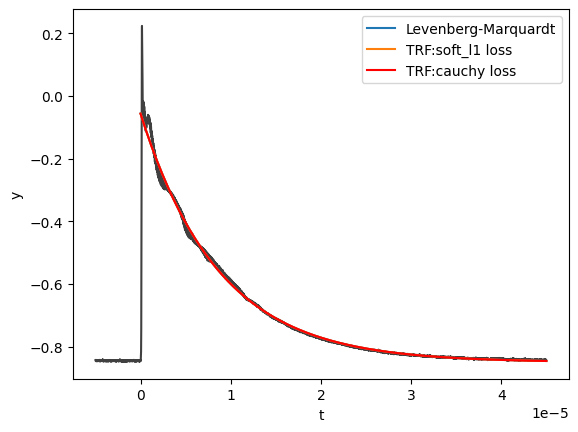

In [48]:
t_test = np.linspace(t_min, t_max, n_points * 10)
y_true = gen_data(t_test, a, b, c)
y_lsq = gen_data(t_test, *res_lsq.x)
y_soft_l1 = gen_data(t_test, *res_soft_l1.x)
y_log = gen_data(t_test, *res_log.x)


plt.plot(times[:-1], waveform, '-k',alpha=0.75)
#plt.plot(t_test, y_true, 'k', linewidth=2, label='true')
plt.plot(t_test, y_lsq, label='Levenberg-Marquardt')
plt.plot(t_test, y_soft_l1, label='TRF:soft_l1 loss')
plt.plot(t_test, y_log,'-r', label='TRF:cauchy loss')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()